In [1]:
!pip install google-cloud-bigquery
from google.colab import auth
from google.cloud import bigquery
from google.colab import data_table
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
project = 'sunlit-webbing-377401'
location = 'US' 
client = bigquery.Client(project=project, location=location)
data_table.enable_dataframe_formatter()
auth.authenticate_user()

In [3]:
client = bigquery.Client(project)

In [4]:
query = """
SELECT *
FROM airline_passenger_satisfaction_ch95458p.airline_passenger_satisfaction
"""

In [5]:
df = client.query(query).to_dataframe()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   int64_field_0                      129880 non-null  Int64  
 1   id                                 129880 non-null  Int64  
 2   Gender                             129880 non-null  object 
 3   Customer_Type                      129880 non-null  object 
 4   Age                                129880 non-null  Int64  
 5   Type_of_Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight_Distance                    129880 non-null  Int64  
 8   Inflight_wifi_service              129880 non-null  Int64  
 9   Departure_Arrival_time_convenient  129880 non-null  Int64  
 10  Ease_of_Online_booking             129880 non-null  Int64  
 11  Gate_location                      1298

In [7]:
df.head()

,int64_field_0,id,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure_Arrival_time_convenient,...,Inflight_entertainment,On_board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,7251,101867,Female,Loyal Customer,18,Business travel,Eco,1747,0,5,...,0,4,3,4,2,4,0,86,59.0,neutral or dissatisfied
1,25512,96422,Male,Loyal Customer,23,Business travel,Eco Plus,1407,0,5,...,0,2,1,4,1,3,0,28,26.0,neutral or dissatisfied
2,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
3,120,27872,Male,Loyal Customer,25,Business travel,Eco Plus,680,0,5,...,1,3,1,4,5,5,1,0,0.0,satisfied
4,250,108010,Male,disloyal Customer,20,Business travel,Business,271,0,0,...,1,5,4,4,4,4,1,0,0.0,satisfied


In [8]:
df.shape

(129880, 25)

In [9]:
df = df.dropna()
df.shape

(129487, 25)

In [10]:
df.duplicated().sum()

0

In [11]:
df.describe()

,int64_field_0,id,Age,Flight_Distance,Inflight_wifi_service,Departure_Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On_board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
count,129487.0,129487.0,129487.0,129487.0,129487.0,129487.0,129487.0,129487.0,129487.0,129487.0,129487.0,129487.0,129487.0,129487.0,129487.0,129487.0,129487.0,129487.0,129487.0,129487.000000
mean,44158.97348,64958.335169,39.428761,1190.210662,2.728544,3.057349,2.756786,2.976909,3.204685,3.25272,3.441589,3.358067,3.383204,3.351078,3.631886,3.306239,3.642373,3.286222,14.643385,15.091129
std,31209.526335,37489.781165,15.117597,997.560954,1.329235,1.526787,1.401662,1.278506,1.329905,1.350651,1.319168,1.334149,1.287032,1.316132,1.180082,1.266146,1.176614,1.313624,37.932867,38.465650
min,0.0,1.0,7.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000
25%,16230.0,32494.5,27.0,414.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,3.0,2.0,0.0,0.000000
50%,38966.0,64972.0,40.0,844.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,4.0,4.0,3.0,4.0,3.0,0.0,0.000000
75%,71440.5,97415.5,51.0,1744.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,5.0,4.0,12.0,13.000000
max,103903.0,129880.0,85.0,4983.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,1592.0,1584.000000


In [12]:
target_counts = df['satisfaction'].value_counts()

print(target_counts)

neutral or dissatisfied    73225
satisfied                  56262
Name: satisfaction, dtype: int64


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129487 entries, 0 to 129879
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   int64_field_0                      129487 non-null  Int64  
 1   id                                 129487 non-null  Int64  
 2   Gender                             129487 non-null  object 
 3   Customer_Type                      129487 non-null  object 
 4   Age                                129487 non-null  Int64  
 5   Type_of_Travel                     129487 non-null  object 
 6   Class                              129487 non-null  object 
 7   Flight_Distance                    129487 non-null  Int64  
 8   Inflight_wifi_service              129487 non-null  Int64  
 9   Departure_Arrival_time_convenient  129487 non-null  Int64  
 10  Ease_of_Online_booking             129487 non-null  Int64  
 11  Gate_location                      1294

In [14]:
df.columns

Index(['int64_field_0', 'id', 'Gender', 'Customer_Type', 'Age',
       'Type_of_Travel', 'Class', 'Flight_Distance', 'Inflight_wifi_service',
       'Departure_Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On_board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes',
       'satisfaction'],
      dtype='object')

In [15]:
df = df.drop(['int64_field_0', 'id'], axis=1)

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

text_data_features = [i for i in list(df.columns) if i not in list(df.describe().columns)]

print('Label Encoder Transformation')
for i in text_data_features :
    df[i] = le.fit_transform(df[i])
    print(i,': ', le.inverse_transform(df[i].unique()),' = ',df[i].unique())

Label Encoder Transformation
Gender :  ['Female' 'Male']  =  [0 1]
Customer_Type :  ['Loyal Customer' 'disloyal Customer']  =  [0 1]
Type_of_Travel :  ['Business travel' 'Personal Travel']  =  [0 1]
Class :  ['Eco' 'Eco Plus' 'Business']  =  [1 2 0]
satisfaction :  ['neutral or dissatisfied' 'satisfied']  =  [0 1]


In [17]:
x = df.drop('satisfaction', axis = 1)
y = df.satisfaction

In [18]:
# Perform feature scaling/normalization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [19]:
from sklearn.feature_selection import SelectKBest, f_classif

# Instantiate the feature selector
selector = SelectKBest(score_func=f_classif, k=6)

# Fit the selector to the data and transform the features
x_new = selector.fit_transform(x, y)

# Get the mask of selected features
mask = selector.get_support()

# Get the names of the selected columns
selected_columns = x.columns[mask]

print(selected_columns)

Index(['Type_of_Travel', 'Class', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On_board_service'],
      dtype='object')


In [20]:
df = df.drop(['Gender', 'Customer_Type', 'Age',
       'Flight_Distance', 'Inflight_wifi_service',
       'Departure_Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes'], axis=1)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129487 entries, 0 to 129879
Data columns (total 7 columns):
 #   Column                  Non-Null Count   Dtype
---  ------                  --------------   -----
 0   Type_of_Travel          129487 non-null  int64
 1   Class                   129487 non-null  int64
 2   Online_boarding         129487 non-null  Int64
 3   Seat_comfort            129487 non-null  Int64
 4   Inflight_entertainment  129487 non-null  Int64
 5   On_board_service        129487 non-null  Int64
 6   satisfaction            129487 non-null  int64
dtypes: Int64(4), int64(3)
memory usage: 8.4 MB


In [22]:
def dtype_rename_integers(df, cols):
    for col in cols:
        df[col] = df[col].astype(int)

dtype_rename_integers(df, ['Type_of_Travel', 'Class', 'Online_boarding', 'Seat_comfort', 'Inflight_entertainment', 'On_board_service', 'satisfaction'])
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 129487 entries, 0 to 129879
Data columns (total 7 columns):
 #   Column                  Non-Null Count   Dtype
---  ------                  --------------   -----
 0   Type_of_Travel          129487 non-null  int64
 1   Class                   129487 non-null  int64
 2   Online_boarding         129487 non-null  int64
 3   Seat_comfort            129487 non-null  int64
 4   Inflight_entertainment  129487 non-null  int64
 5   On_board_service        129487 non-null  int64
 6   satisfaction            129487 non-null  int64
dtypes: int64(7)
memory usage: 7.9 MB


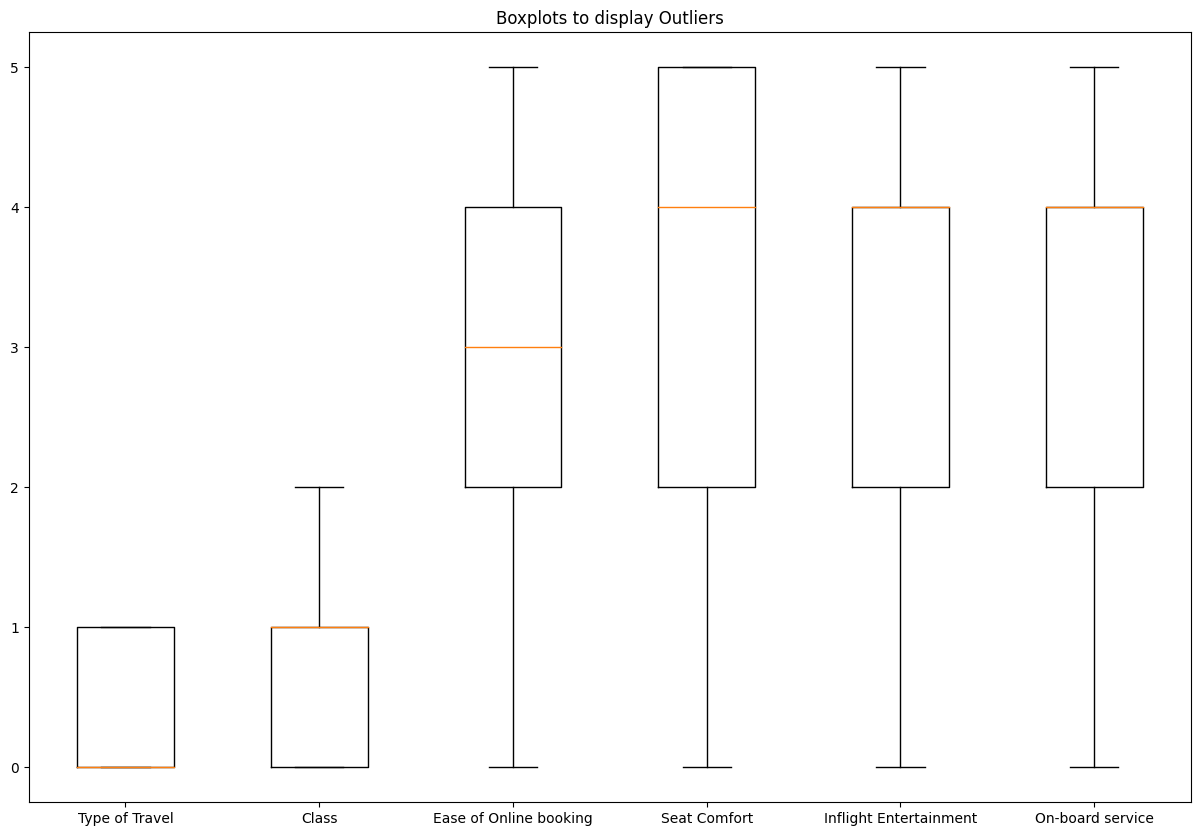

In [23]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.boxplot(df[['Type_of_Travel', 'Class', 'Online_boarding', 'Seat_comfort', 'Inflight_entertainment', 'On_board_service']])
ax.set_xticklabels(['Type of Travel', 'Class', 'Ease of Online booking', 'Seat Comfort', 'Inflight Entertainment', 'On-board service'])

plt.title('Boxplots to display Outliers')

plt.show()

In [24]:
df.shape

(129487, 7)

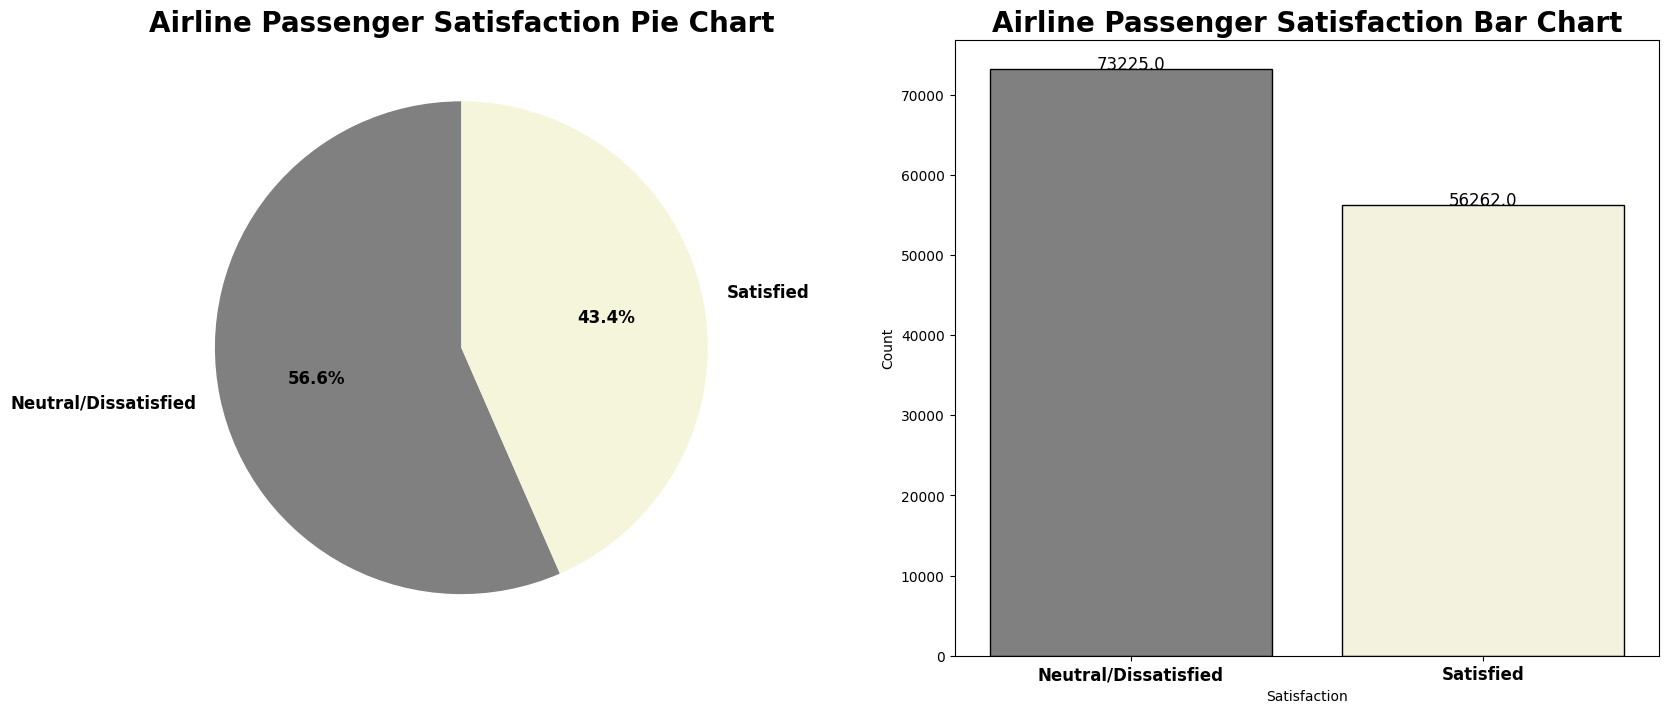

In [25]:
counts = df['satisfaction'].value_counts()

# create a pie chart
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Define data for the pie chart

labels = ['Neutral/Dissatisfied', 'Satisfied']
colors = ['gray', 'beige']

ax1.pie(counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, textprops={'fontweight': 'bold', 'fontsize': 12})
ax1.set_title('Airline Passenger Satisfaction Pie Chart', fontdict={'fontweight': 'bold', 'fontsize': 20})

ax2 = sns.countplot(x='satisfaction', data = df ,palette = colors ,edgecolor = 'black')
ax2.set(xlabel='Satisfaction', ylabel='Count')
ax2.set_title('Airline Passenger Satisfaction Bar Chart', fontdict={'fontweight': 'bold', 'fontsize': 20})
for rect in ax2.patches:
    ax2.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 12) 
    ax2.set_xticklabels(['Neutral/Dissatisfied','Satisfied'], fontdict={'fontweight': 'bold', 'fontsize': 12})


plt.show()

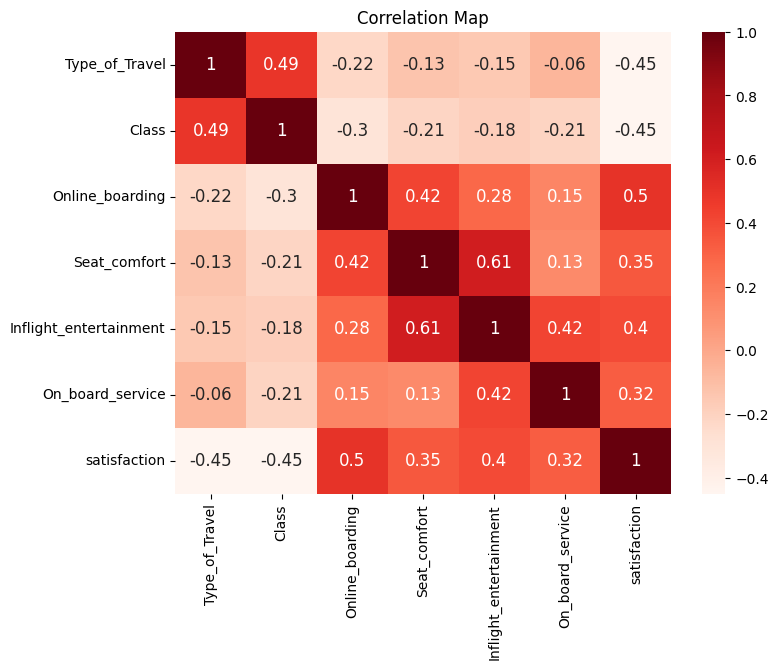

In [26]:
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, cmap='Reds', annot=True, annot_kws={'fontsize': 12})
plt.title('Correlation Map')
plt.show()

In [27]:
df.describe()

,Type_of_Travel,Class,Online_boarding,Seat_comfort,Inflight_entertainment,On_board_service,satisfaction
count,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000
mean,0.309236,0.593704,3.252720,3.441589,3.358067,3.383204,0.434499
std,0.462180,0.621371,1.350651,1.319168,1.334149,1.287032,0.495693
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,2.000000,2.000000,2.000000,2.000000,0.000000
50%,0.000000,1.000000,3.000000,4.000000,4.000000,4.000000,0.000000
75%,1.000000,1.000000,4.000000,5.000000,4.000000,4.000000,1.000000
max,1.000000,2.000000,5.000000,5.000000,5.000000,5.000000,1.000000


In [28]:
features = ['Type_of_Travel', 'Class', 'Online_boarding', 'Seat_comfort', 'Inflight_entertainment', 'On_board_service']

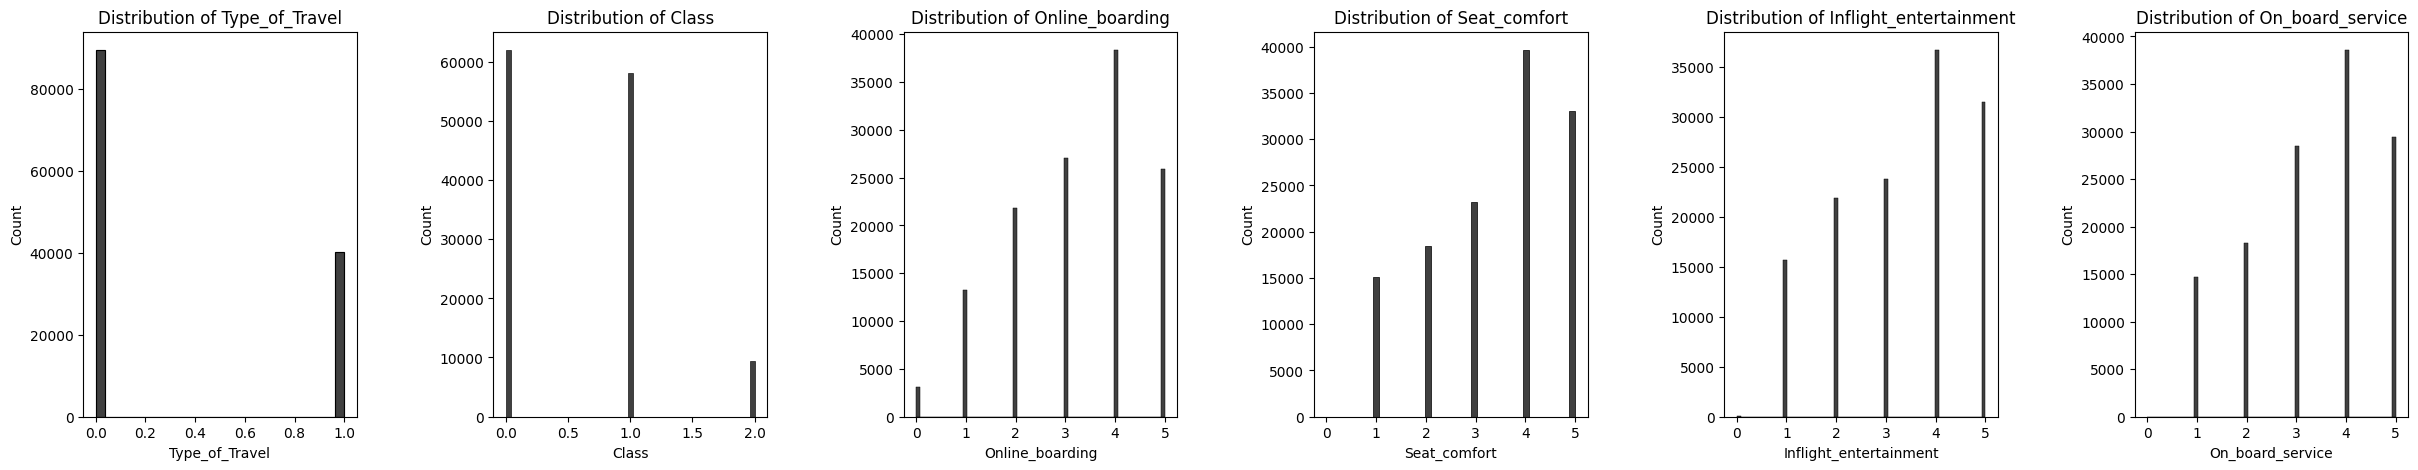

In [29]:
fig, ax = plt.subplots(nrows = 1,ncols = 6,figsize = (30,5))
for i in range(len(features)):
    plt.subplot(1,6,i+1)
    sns.histplot(df[features[i]],color='k')
    title = 'Distribution of ' + features[i]
    plt.title(title)
    
plt.subplots_adjust(wspace=0.5)
plt.show()

<ipython-input-30-88f71d5b8403>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,2,i+1)
<ipython-input-30-88f71d5b8403>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,2,i+1)
<ipython-input-30-88f71d5b8403>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,2,i+1)
<ipython-input-30-88f71d5b8403>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,2,i+1)


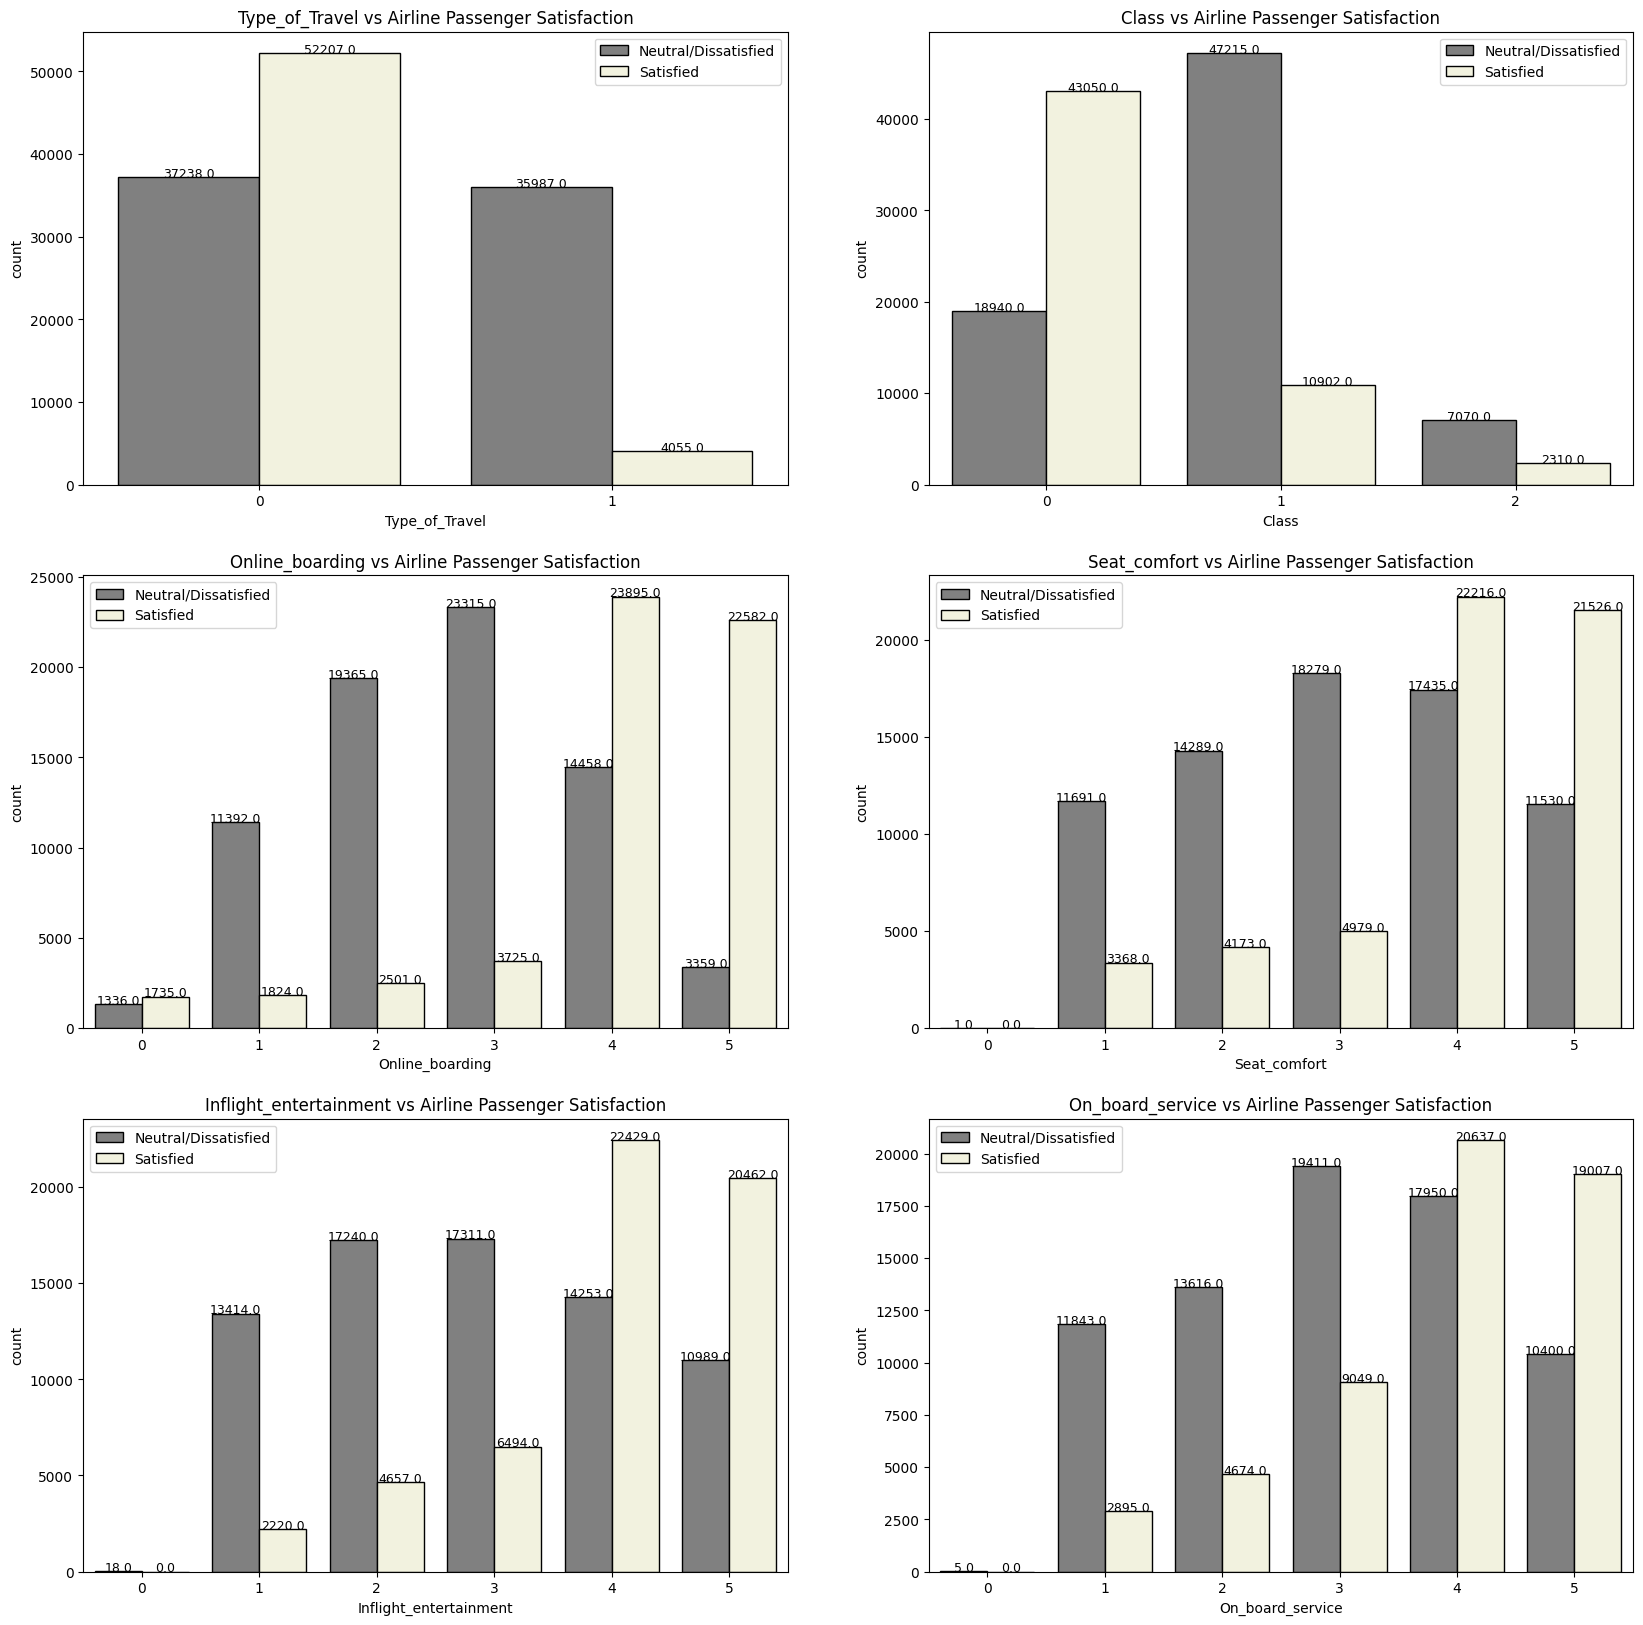

In [30]:
fig = plt.subplots(nrows = 2,ncols = 2,figsize = (20,20))
for i in range(len(features)):
  plt.subplot(3,2,i+1)
  ax = sns.countplot(x=features[i], hue ="satisfaction", data=df, palette=['grey','beige'], edgecolor='black')

  handles, labels = ax.get_legend_handles_labels()
  labels[0] = 'Neutral/Dissatisfied'
  labels[1] = 'Satisfied'
  ax.legend(handles=handles, labels=labels)

  title = features[i] + ' vs Airline Passenger Satisfaction'
  plt.title(title)
  
  for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 9)

  